# QuantumSim - Counter
Author: Nico Kuijpers<br>
Date: January 2, 2025

In this notebook we introduce a counter to count the number of qubits in state $|1\rangle$. The qubits are initialized by an input string. The length of the string corresponds to the number of qubits of which the the states $|1\rangle$ are counted. Characters 'I', 'X', and 'H' indicate which operation is to be applied upon initialization.

The counter is implemented in QuantumSim. In this notebook, a generic version of the Toffoli operation is applied, which has a list of control qubits and a target qubit as parameters. 

The implementation of the generic Toffoli gate in QuantumSim is described in this notebook:

https://github.com/nicokuijpers/QuantumSim/blob/main/QuantumSimMoreOperations.ipynb

In [1]:
from quantumsim import *

## Count till one
Below a function is defined to implement a basic counter circuit. The circuit has $2$ qubits. 
Depending on the input character, the first qubit is initialized with either a Pauli X, Hadamard or Identity operation. 
Next, a CNOT operation is applied with control qubit $0$ and target qubit $1$.
Upon measurement, the second qubit will be in state $|1\rangle$ when first qubit is also in state $|1\rangle$, thus counting the number of ones.

In [2]:
def create_counter_circuit_one(input_char:chr) -> Circuit:
    circuit = Circuit(2)
    
    # Initialize input qubit
    if input_char == 'X':
         circuit.pauli_x(0)
    elif input_char == 'H':
        circuit.hadamard(0)
    else:
        circuit.identity(0)

    # Counter
    circuit.cnot(0,1)
    return circuit

Below a circuit is created with input character is 'H'. With this input this, a Bell state is generated.

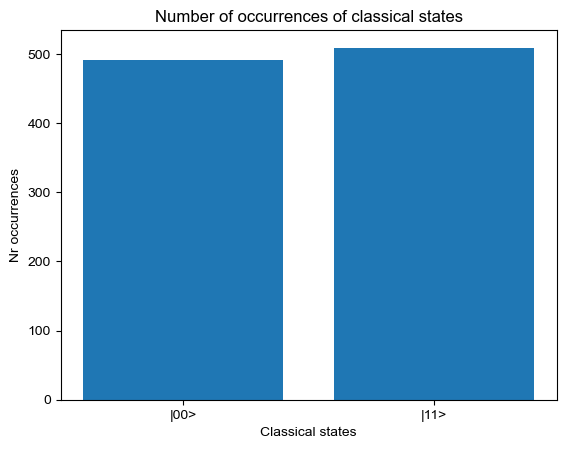

In [3]:
input_char = 'H'
circuit = create_counter_circuit_one(input_char)
result = QuantumUtil.measure_circuit(circuit)
QuantumUtil.histogram_of_classical_states(result)

## Count till three
Below a function is defined to implement a counter circuit that is able to count till three. The circuit has $5$ qubits. 
Depending on the corresponding characters in the input string, the first $3$ qubits are initialized with either a Pauli X, Hadamard or Identity operations. 
The two remaining qubits form a binary counter with qubit $3$ the most significant bit and qubit $4$ the least significant bit.

The counter is implemented as follows. 
For each of the input qubits, a Toffoli operation is applied followed by a CNOT. 
The Toffolli operation ensures that the most significant bit becomes $|1\rangle$
when both the input qubit and the least significant bit are $|1\rangle$. 
The CNOT operation ensures that the least signicant bit is flipped when the input qubit is in state $|1\rangle$.

In [4]:
def create_counter_circuit_three(input_string:str) -> Circuit:
    if len(input_string) != 3:
        raise ValueError("Wrong length input_string")
    
    n = 3 # input qubits
    m = 2 # counter qubits
    circuit = Circuit(n + m)

    # Initialize input qubits
    for q in range(n):
        char = input_string[q]
        if char == 'X':
            circuit.pauli_x(q)
        elif char == 'H':
            circuit.hadamard(q)
        else:
            circuit.identity(q)
        
    # Counter
    for q in range(n):
        circuit.toffoli(q, n + 1, n)
        circuit.cnot(q, n + 1)
    return circuit

Below a circuit is created with input string "HXX". Depending on the state of the first qubit, the last two qubits are either 10 (decimal 2) or 11 (decimal 3). Thus, the number of ones in the first three qubits is counted.

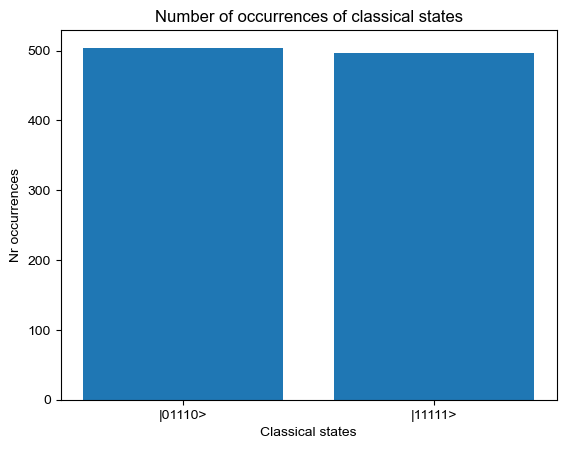

In [5]:
input_string = "HXX"
circuit = create_counter_circuit_three(input_string)
result = QuantumUtil.measure_circuit(circuit)
QuantumUtil.histogram_of_classical_states(result)

Below all probabilities of intermediate states are shown.

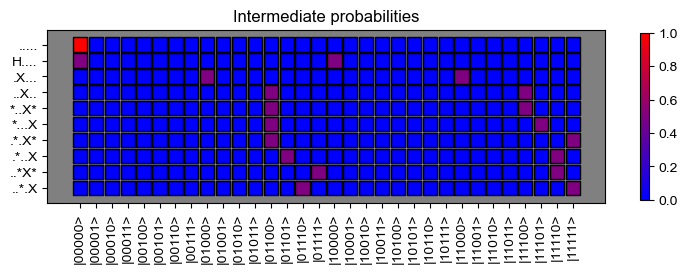

In [6]:
QuantumUtil.show_all_probabilities(circuit, show_description=False)

## Count till seven
Below a function is defined to implement a counter circuit that is able to count till seven. The circuit has $10$ qubits. 
Depending on the corresponding characters in the input string, the first $7$ qubits are initialized with either a Pauli X, Hadamard or Identity operations. 
The three remaining qubits form a binary counter with qubit $7$ the most significant bit and qubit $9$ the least significant bit.

The counter is implemented as follows. 
For each of the input qubits, a Toffoli operation is applied with three control qubits, followed by a Toffoli with two control qubits and a CNOT. 
The first Toffoli operation ensures that the most signifcan bit becomes $|1\rangle$
when the input qubit and the other bits are in state $|1\rangle$.
The second Toffolli operation ensures that the second bit becomes $|1\rangle$
when both the input qubit and the least significant bit are $|1\rangle$. 
The CNOT operation ensures that the least signicant bit is flipped when the input qubit is in state $|1\rangle$.

In [7]:
def create_counter_circuit_seven(input_string:str):
    if len(input_string) != 7:
        raise ValueError("Wrong length input_string")
    
    n = 7 # input qubits
    m = 3 # counter qubits
    circuit = Circuit(n + m)

    # Initialize input qubits
    for q in range(n):
        char = input_string[q]
        if char == 'X':
            circuit.pauli_x(q)
        elif char == 'H':
            circuit.hadamard(q)
        else:
            circuit.identity(q)

    # Counter
    for q in range(n):
        circuit.generic_toffoli([q, n + 2, n + 1], n)
        circuit.toffoli(q, n + 2, n + 1)
        circuit.cnot(q, n + 2)

    return circuit


Below a circuit is created with input string "XXXXXXX". With this input string, the result is $|1111111111\rangle$. 
Thus, the number of ones in the first seven qubits is counted and the result is 111 (decimal 7).

You can try other input strings and check the result.

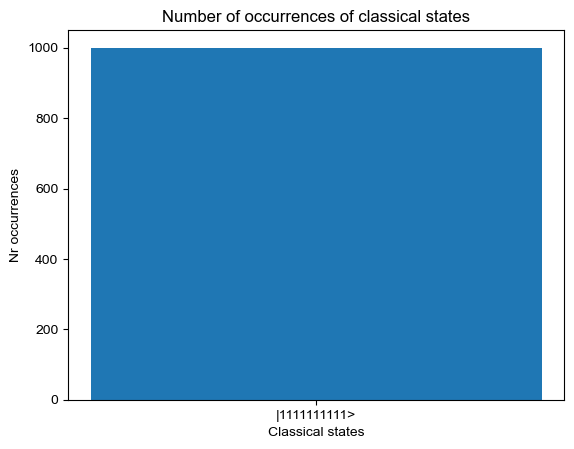

In [8]:
input_string = "XXXXXXX"
circuit = create_counter_circuit_seven(input_string)
result = QuantumUtil.measure_circuit(circuit)
QuantumUtil.histogram_of_classical_states(result)

Below, the gates for this circuit are shown. Control qubits for Toffoli and CNOT operations are indicated with an asterisk.

In [9]:
circuit.print_gates()

X.........
.X........
..X.......
...X......
....X.....
.....X....
......X...
*......X**
*.......X*
*........X
.*.....X**
.*......X*
.*.......X
..*....X**
..*.....X*
..*......X
...*...X**
...*....X*
...*.....X
....*..X**
....*...X*
....*....X
.....*.X**
.....*..X*
.....*...X
......*X**
......*.X*
......*..X


## Application in Grover's Algorithm
In the notebook below, the counter is applied in a Grover's algorithm to search for binary strings of length $n$ having exactly $k$ ones ($0 \leq k \leq n$). 

https://github.com/nicokuijpers/QuantumSim/blob/main/QuantumSimCounterGroverSearch.ipynb